In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection


In [ ]:
df = pd.read_csv("bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
df.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


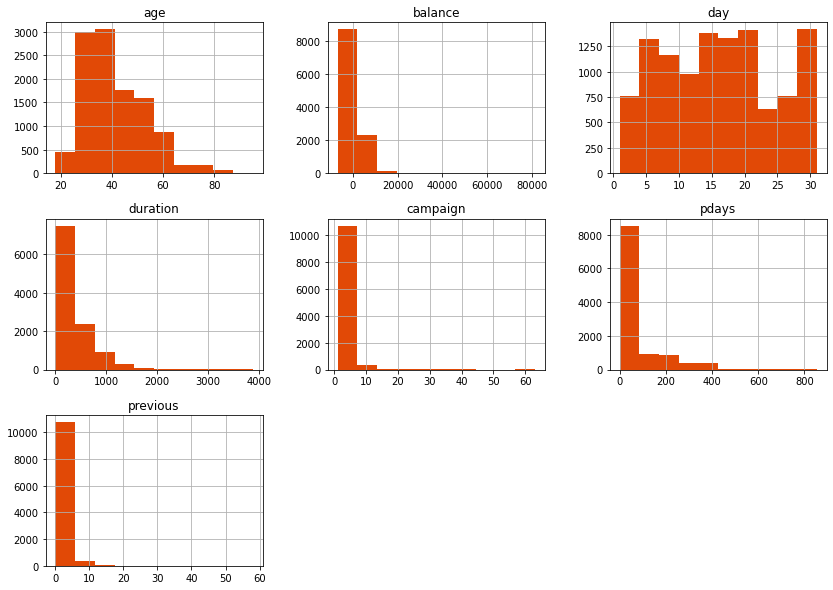

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=10, figsize=(14,10), color='#E14906')
plt.show()

In [ ]:
df["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [ ]:
index_with_nan = df.index[df.isnull().any(axis=1)]

print(index_with_nan)

Int64Index([], dtype='int64')


In [ ]:
df = df.apply(LabelEncoder().fit_transform)

In [ ]:
X = df.drop(['deposit'],axis=1)
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,15,1,2,0,0,425,1,0,0,19,0,255,0,0,0,3
11158,21,7,1,1,0,1149,0,0,2,15,6,81,3,0,0,3
11159,14,9,2,1,0,453,0,0,0,18,1,154,1,0,0,3
11160,25,9,1,1,0,424,0,1,0,7,8,7,1,155,5,0


In [ ]:
y=df.iloc[:,-1].values
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
y.shape

(11162,)

In [ ]:
X.shape

(11162, 16)

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split


In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8929, 16) (2233, 16) (8929,) (2233,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
classifier = Sequential()


In [ ]:

classifier.add(Dense(units=6,
                     activation='relu',
                     kernel_initializer='uniform',
                     input_dim=16))
classifier.add(Dropout(rate=0.2))

In [ ]:
classifier.add(Dense(units=6,
                     activation='relu',
                     kernel_initializer='uniform',
                     input_dim=16))
classifier.add(Dropout(rate=0.2))

In [ ]:
classifier.add(Dense(units=1,
                     activation='sigmoid',
                     kernel_initializer='uniform'))

In [ ]:
classifier.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [ ]:

from time import time


#fitting ANN
start = time()
classifier.fit(x_train, y_train, batch_size=10,epochs=30)

Epoch 1/30
893/893 [==============================] - 2s 2ms/step - loss: 0.6231 - accuracy: 0.6482
Epoch 2/30
893/893 [==============================] - 1s 2ms/step - loss: 0.5419 - accuracy: 0.7279
Epoch 3/30
893/893 [==============================] - 1s 2ms/step - loss: 0.5226 - accuracy: 0.7532
Epoch 4/30
893/893 [==============================] - 2s 2ms/step - loss: 0.5161 - accuracy: 0.7440
Epoch 5/30
893/893 [==============================] - 1s 2ms/step - loss: 0.5079 - accuracy: 0.7566
Epoch 6/30
893/893 [==============================] - 1s 2ms/step - loss: 0.5043 - accuracy: 0.7576
Epoch 7/30
893/893 [==============================] - 1s 2ms/step - loss: 0.4974 - accuracy: 0.7599
Epoch 8/30
893/893 [==============================] - 1s 1ms/step - loss: 0.4961 - accuracy: 0.7599
Epoch 9/30
893/893 [==============================] - 1s 1ms/step - loss: 0.4924 - accuracy: 0.7583
Epoch 10/30
893/893 [==============================] - 1s 2ms/step - loss: 0.4845 - accuracy: 0.7635

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.50)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test,y_pred)*100,'%')

75.05597850425436 %
